# <font color='#28B463'>CLASSIFICATION METRICS

<br>

## <font color='#28B463'>Introduction

<br>
An error metric is a type of metric used to measure the error of a forecasting model; they provide a way to quantitatively compare the performance of competing models. Some common error metrics for classification are :

<br>
<ul style="list-style-type:square">
    <li>
        accuracy
    </li>
    <br>
    <li>
        precision
    </li>
    <br>
    <li>
        recall
    </li>
    <br>
    <li>
        area under the curve (<b>AUC</b>)
    </li>
</ul>

In [30]:
# SETUP : importing

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import sklearn.linear_model as lm
import utilcompute as uc
from pprint import pprint


In [31]:
# SETUP : reading in the datasets

#print(load_iris().DESCR)
data = np.column_stack( (load_iris().data, load_iris().target) )
df = pd.DataFrame(data)
df.columns = ['sepal length', 'sepal width', 'petal length','petal width', 'species']
#print('df.shape[0] : ', df.shape[0])

df.shape[0] :  150


In [32]:
#df.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [33]:
target = 'species'
if (isinstance(target, list)):
    features = [c for c in df.columns.values.tolist() if (c not in target)]
else:
    features = [c for c in df.columns.values.tolist() if (c != target)]
#print('features : ', features)
#print('target   : ', target)

In [34]:
# DATA PREPROCESSING : features standardization

vif_dict = uc.compute_vif(df = df, features = features)
print('df : ')
print()
pprint(vif_dict)

print()

df_std = uc.standardize(df = df, included = features, excluded = target)

vif_dict = uc.compute_vif(df = df_std, features = features)
print('df_std : ')
print()
pprint(vif_dict)

df = df_std


df : 

{'petal length': 173.96896536339727,
 'petal width': 55.48868864572551,
 'sepal length': 264.7457109493044,
 'sepal width': 97.111605833803296}

df_std : 

{'petal length': 31.397291650719751,
 'petal width': 16.141563956997683,
 'sepal length': 7.1031134428332869,
 'sepal width': 2.0990386257420881}


In [35]:
# GLOBAL PARAMETERS 

train_perc = 0.8
delimiter = int(len(df) * train_perc)
s = 1

print('train set size   : ', delimiter)
print('test  set size   : ', (len(df) - delimiter))
print()
print('seed : ', s)


train set size   :  120
test  set size   :  30

seed :  1


In [36]:
np.random.seed(s)
df_shuffled = df.reindex(np.random.permutation(df.index))    
    
train = df_shuffled[:delimiter]
test = df_shuffled[delimiter:]

model = lm.LogisticRegression()
model.fit(train[features], train[target])

y_pred = model.predict(test[features])
metrics = uc.compute_classification_metrics(y = test[target], y_pred = y_pred)


In [37]:
print('metrics')
print()
pprint(metrics)


metrics

{'ACC': 0.8666666666666667}


In [38]:
# the choice of the feature to use in the 2d plots
feature = 'petal width'

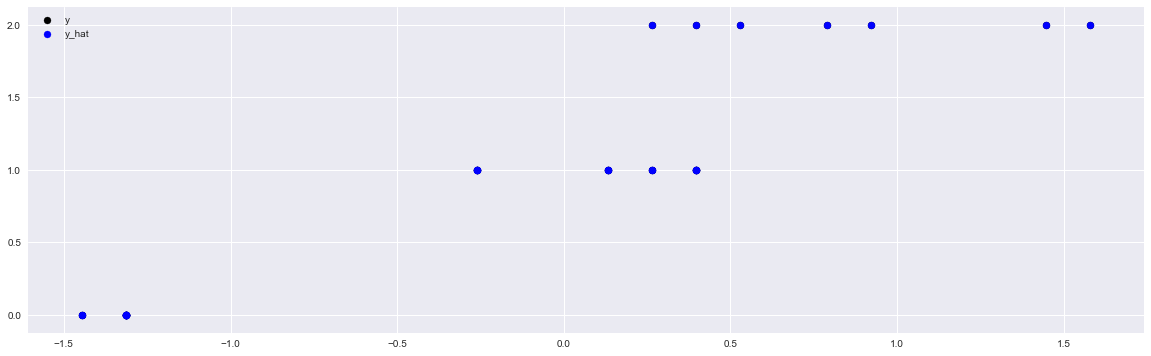

In [39]:
# CLASSIFICATION PLOT

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 6))

ax.scatter(test[feature], test[target],  color='black', label = 'y')
ax.scatter(test[feature], y_pred, color='blue', label = 'y_hat')
ax.legend(loc = 'upper left')

plt.show()

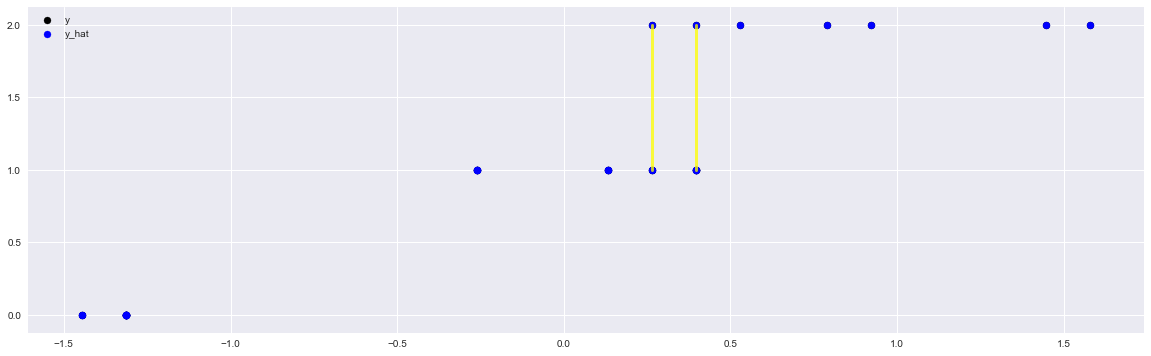

ACC :  0.866666666667


In [43]:
# MSE

# description:

# mse (mean squaed error) measures the average of the squares of the errors, 
# being the error the difference between the target value and the prediction value


# ----------------------------------------------------------------------------------------------------------------------------- #


fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 6))

ax.scatter(test[feature], test[target],  color='black', label = 'y')
ax.scatter(test[feature], y_pred, color='blue', label = 'y_hat')
ax.legend(loc = 'upper left')

for pos in range(len(test[target])):
    x = test[feature].iloc[pos]
    y_min = min(test[target].iloc[pos], y_pred[pos])
    y_max = max(test[target].iloc[pos], y_pred[pos])
    ax.plot((x,x), (y_min,y_max), linestyle = 'solid', color = 'yellow', alpha = 0.5, linewidth = 3)
        
plt.show()

print('ACC : ', metrics['ACC'])
